In [21]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [22]:
#Dataset
dataset = pd.read_csv('data_gojek.csv')
x = dataset.drop(["linha", "car_or_bus","rating_weather", "rating_bus","rating","time"], axis = 1)
x.head()

,id,id_android,speed,distance
0,1,0,19.210586,2.652
1,2,0,30.848229,5.290
2,3,1,13.560101,0.918
3,4,1,19.766679,7.700
4,8,0,25.807401,3.995


In [23]:
x = dataset.iloc[:, 2:4]
x.head()

,speed,time
0,19.210586,0.138049
1,30.848229,0.171485
2,13.560101,0.067699
3,19.766679,0.389544
4,25.807401,0.154801


In [24]:
x_array =  np.array(x)
print(x_array)

[[1.92105856e+01 1.38048889e-01]
 [3.08482291e+01 1.71484722e-01]
 [1.35601009e+01 6.76986111e-02]
 [1.97666790e+01 3.89544444e-01]
 [2.58074009e+01 1.54800556e-01]
 [1.34691332e+00 6.68194444e-03]
 [3.68507874e+01 2.28000556e-01]
 [1.74051313e+01 3.87816667e-02]
 [1.53954361e+01 5.26844444e-01]
 [8.90272944e+00 3.03277778e-03]
 [1.50413480e+01 2.17866111e-01]
 [1.44400981e+01 2.68142222e-01]
 [1.63567325e+01 7.70325000e-02]
 [1.75427999e+01 3.33869167e-01]
 [9.45181557e+00 2.76772222e-01]
 [9.45181557e+00 2.76772222e-01]
 [1.62635039e+01 4.50948333e-01]
 [2.12235944e+01 2.89724722e-01]
 [1.94236545e+01 2.36567222e-01]
 [2.07996291e+01 4.25440278e-01]
 [8.72437242e+00 1.94294778e+00]
 [8.72437242e+00 1.94294778e+00]
 [8.68613764e+00 5.02409722e-01]
 [5.49959473e+01 1.01407472e+00]
 [5.49959473e+01 1.01407472e+00]
 [1.26110448e+01 5.79095556e-01]
 [1.45342872e+01 7.90544444e-02]
 [1.02882267e+01 3.18422222e-01]
 [1.83281891e+01 1.30945833e-01]
 [1.71776350e+01 1.66088056e-01]
 [1.709782

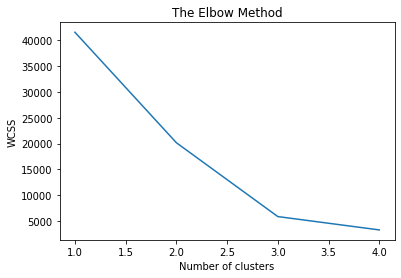

In [25]:
#menentukan K menggunakan WCSS elbow graph
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

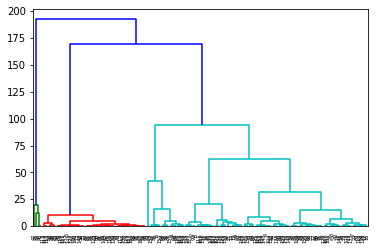

In [26]:
#dendrogram
dendrogram = sch.dendrogram(sch.linkage(x_array, method='ward'))

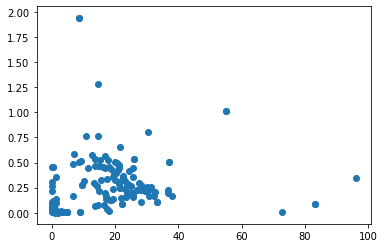

In [27]:
plt.scatter(x_array[:,0],x_array[:,1])

In [28]:
hc = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage = 'ward')

In [29]:
# fit dataset and predict 
y_hc = hc.fit_predict(x)

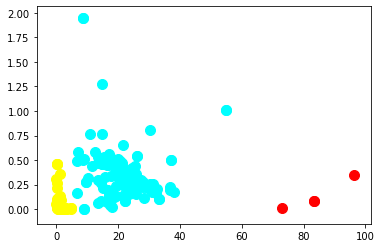

In [30]:
plt.scatter(x_array[y_hc == 0,0], x_array[y_hc == 0,1], s = 100, c = 'cyan')
plt.scatter(x_array[y_hc == 1,0], x_array[y_hc == 1,1], s = 100, c = 'red')
plt.scatter(x_array[y_hc == 2,0], x_array[y_hc == 2,1], s = 100, c = 'yellow')